In [13]:

####################################################################################################
####################################################################################################

import datetime
import sys
import os.path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from IPython.display import display
from PIL import Image

import tensorflow as tf

print (tf.__version__)

import keras
import keras.utils.vis_utils
from keras import backend as K
from keras import layers
from keras import regularizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model

sys.path.append(os.path.abspath("../"))
from xy_s2integrals_models import *
from helpers import *

sys.path.append(os.path.abspath("../../"))
from pax_utils import s1s2_utils

pd.set_option('display.max_columns', 500)


1.4.1


In [14]:

####################################################################################################
####################################################################################################

nEventsTrain = 100000
#nEventsTrain = 1000


####################################################################################################
####################################################################################################

#file_all     = "../../data_lfs/merged_all_200k_1803261941.pkl"
#file_all     = "../../data_lfs/merged_all_200k_1803261941.pkl"
#file_all     = "../../pax_merge/merged/apr26/merged_all_200000.pkl"
file_all     = "../../pax_merge/merged/apr30/merged_all_200000.pkl"


df_all   = pd.read_pickle(file_all)
df_all   = df_all[df_all['intr_count'] == 1].reset_index(drop=True)
df_all   = df_all[0:nEventsTrain][:]


####################################################################################################
####################################################################################################

s2_cols = s1s2_utils.getS2integralsDataFrameColumns()

df_train_input = df_all[:][s2_cols]
df_train_truth = df_all[:][['x', 'y']]


####################################################################################################
####################################################################################################

checkTrainingData(df_train_input, df_train_truth)


####################################################################################################
####################################################################################################
#
#display(df_train_input[0:2][s2_cols])
#
#f_test  = '../../pax_merge/merged/apr26/zip/zip00000.pkl'
#df_test = pd.read_pickle(f_test)
#df_test = df_test[df_test['intr_count'] == 1].reset_index(drop=True)
#display(df_test[0:3][s2_cols])




Input shape: (100000, 127)
Truth shape: (100000, 2)

Input DataFrame: 


,s2_area_000,s2_area_001,s2_area_002,s2_area_003,s2_area_004,s2_area_005,s2_area_006,s2_area_007,s2_area_008,s2_area_009,s2_area_010,s2_area_011,s2_area_012,s2_area_013,s2_area_014,s2_area_015,s2_area_016,s2_area_017,s2_area_018,s2_area_019,s2_area_020,s2_area_021,s2_area_022,s2_area_023,s2_area_024,s2_area_025,s2_area_026,s2_area_027,s2_area_028,s2_area_029,s2_area_030,s2_area_031,s2_area_032,s2_area_033,s2_area_034,s2_area_035,s2_area_036,s2_area_037,s2_area_038,s2_area_039,s2_area_040,s2_area_041,s2_area_042,s2_area_043,s2_area_044,s2_area_045,s2_area_046,s2_area_047,s2_area_048,s2_area_049,s2_area_050,s2_area_051,s2_area_052,s2_area_053,s2_area_054,s2_area_055,s2_area_056,s2_area_057,s2_area_058,s2_area_059,s2_area_060,s2_area_061,s2_area_062,s2_area_063,s2_area_064,s2_area_065,s2_area_066,s2_area_067,s2_area_068,s2_area_069,s2_area_070,s2_area_071,s2_area_072,s2_area_073,s2_area_074,s2_area_075,s2_area_076,s2_area_077,s2_area_078,s2_area_079,s2_area_080,s2_area_081,s2_area_082,s2_area_083,s2_area_084,s2_area_085,s2_area_086,s2_area_087,s2_area_088,s2_area_089,s2_area_090,s2_area_091,s2_area_092,s2_area_093,s2_area_094,s2_area_095,s2_area_096,s2_area_097,s2_area_098,s2_area_099,s2_area_100,s2_area_101,s2_area_102,s2_area_103,s2_area_104,s2_area_105,s2_area_106,s2_area_107,s2_area_108,s2_area_109,s2_area_110,s2_area_111,s2_area_112,s2_area_113,s2_area_114,s2_area_115,s2_area_116,s2_area_117,s2_area_118,s2_area_119,s2_area_120,s2_area_121,s2_area_122,s2_area_123,s2_area_124,s2_area_125,s2_area_126
0,1.715228,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.293108,1.385255,0.000000,0.0,0.000000,0.000000,2.072034,4.501663,1.349055,0.958684,2.223428,0.000000,1.164583,5.857351,0.000000,0.000000,0.000000,0.0,0.0,1.266834,0.868740,0.000000,0.000000,2.124950,3.074808,0.0,1.773188,1.305813,0.000000,0.000000,0.694174,3.873550,3.135284,1.326145,2.519425,1.157406,0.000000,0.311742,1.220719,3.458222,2.217332,6.163320,1.198651,2.338596,1.921769,8.328659,0.960035,2.164134,0.000000,0.000000,3.961349,0.825485,2.903254,0.0,0.000000,1.520284,0.0,0.000000,1.164861,0.000000,0.000000,0.838717,1.313889,1.142778,0.0,1.621347,1.229631,5.806737,10.277655,7.554566,0.0,4.693172,2.250064,1.906551,2.806254,1.783325,1.398358,0.0,1.494015,0.0,0.000000,0.000000,0.0,3.830333,1.377378,2.942090,3.016679,1.294954,5.534491,19.514210,64.626817,56.903693,11.805828,0.0,3.315009,1.398036,0.000000,1.243181,1.596640,4.508277,3.620271,5.161087,2.034753,3.344747,48.594472,171.410791,59.792901,3.282310,6.564991,0.0,0.400128,2.742959,3.460256,8.159419,38.424745,15.890681,1.354377,10.354574
1,0.912039,0.0,0.0,1.545933,0.000000,0.000000,2.568431,0.000000,2.604376,2.010018,0.000000,2.509851,0.0,0.761297,0.000000,0.644646,0.000000,0.000000,0.948948,1.117482,0.000000,0.000000,2.725816,1.270937,2.628733,4.742414,0.0,0.0,0.000000,1.895981,2.370596,0.000000,0.750847,0.000000,0.0,1.120101,1.026658,2.280590,3.360602,2.603758,0.000000,1.225734,0.000000,0.000000,1.790937,0.000000,1.827831,5.588963,0.000000,3.288133,2.693403,0.000000,3.384568,0.000000,2.287949,2.579494,5.521104,3.623718,1.117050,2.833725,0.785492,2.160752,0.0,0.000000,0.000000,0.0,2.172470,0.000000,1.907223,0.000000,2.127145,0.000000,5.261355,0.0,1.204277,2.228516,2.343794,6.073021,1.298379,0.0,1.264793,0.000000,1.901614,1.237839,0.733375,0.000000,0.0,3.896121,0.0,1.749521,2.822337,0.0,0.000000,2.963759,7.557143,5.272223,4.038518,17.276584,16.400132,5.770940,7.244038,0.000000,0.0,3.705206,1.791430,2.069158,0.000000,1.281615,1.544899,2.030569,5.923463,24.636272,107.114358,72.005293,29.787386,8.616594,0.493382,3.208600,0.0,0.000000,5.596787,26.363896,126.844246,55.087875,8.130994,8.979807,13.682349
2,0.000000,0.0,0.0,0.000000,2.104002,0.000000,1.731047,2.784006,0.000000,5.977608,0.986695,1.532307,0.0,12.324349,5.767895,4.642557,3.559306,2.219113,3.735399,0.656329,1.425817,1.926498,0.814056,0.000000,0.000000,0.000000,0.0,0.0,1.032113,3.447435,2.048169,0.000000,1.640899,0.000000,0.0,0.000000,1.398916,0.569


Truth DataFrame:


,x,y
0,2.626434,-17.960824
1,10.907536,-6.312277
2,24.631697,-12.763601
3,2.726006,37.749081
4,-18.078293,-23.212466


In [15]:

##########################################################################################
##########################################################################################

lst_models = [
    #Xenon1TPosRecMLP(),
    bargeModel()
    #xy_s2integrals_dnnModel()
]



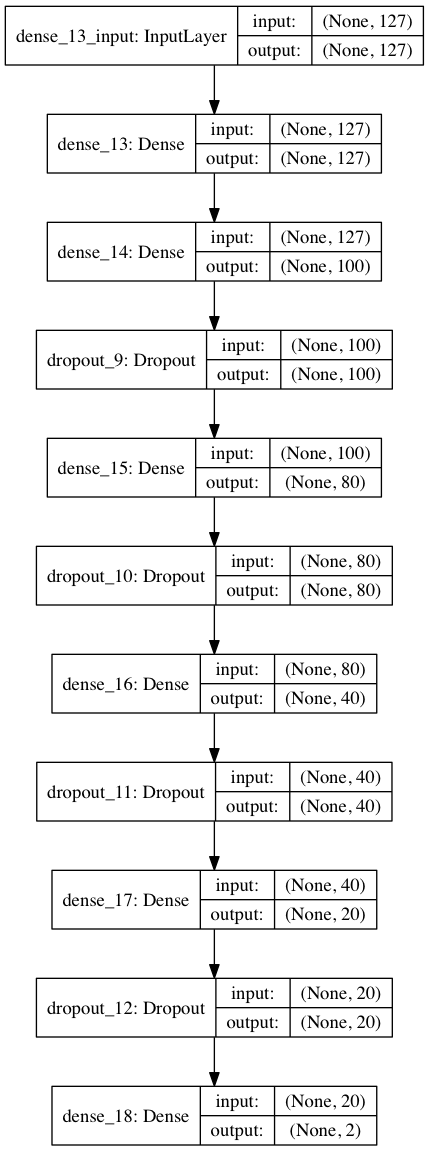


Training Complete!


In [27]:

##########################################################################################
##########################################################################################

for iModel in range(0, len(lst_models)):
    
    ######################################################################################
    ######################################################################################

    model, model_name = lst_models[iModel]
  
    folder   = "models/"    
    name     = 'model' + '_' + model_name + '_may02'
    name_h5  = folder + name + ".h5"
    name_png = folder + name + ".png"

    
    ######################################################################################
    ######################################################################################

    plot_model(model, to_file=name_png, show_layer_names=True, show_shapes=True)

    trainable_count     = int(np.sum([K.count_params(p) for p in set(model.trainable_weights)]))
    non_trainable_count = int(np.sum([K.count_params(p) for p in set(model.non_trainable_weights)]))

    print()
    display(Image.open(name_png))
    print()
    assert(non_trainable_count == 0)
    #print("Model Summary:")
    #summary = model.summary()
    #print()


    ######################################################################################
    # Fit Model
    ######################################################################################
    
    epochs     = 10
    batch_size = 64
    verbose    = 1
    
    model.fit(df_train_input.values, df_train_truth.values, epochs=epochs, batch_size=batch_size, verbose=verbose)

             
    ######################################################################################
    # Save Model
    ######################################################################################
    
    model.save(name_h5, overwrite=True)
    
    
    ######################################################################################
    ######################################################################################
    
    continue
    
    